# Final Project: Stock Analysis  
## Pandeli Shyta 
### Class Wed 9:30-12:15
##### The goal for this project is to explore historical stock prices using twelvedata's api.   
##### The questions that I will explore are as follows:
##### 1. If a stock's price is above its 20 day moving average, what is the likelihood of a stock increasing in value after x days of consecutive up days?
##### 2. If a stock's price is above its 20 day and 200 day moving average, what is the likelihood of a stock increasing in value after x days of consecutive up days?
##### 3. If a stock's price is above its 20 day moving average, what is the likelihood of a stock increasing in value after x days of consecutive down days?
##### 4. If a stock's price is above its 20 day and 200 day moving average, what is the likelihood of a stock increasing in value after x days of consecutive down days?
##### 5. If a stock's price is below its 20 day moving average, what is the likelihood of a stock increasing in value after x days of consecutive down days and by how much?
##### 6.  If a stock's price is below its 20 day moving average, what is the likelihood of a stock increasing in value after x days of consecutive up days and by how much?

## Setting up environment

In [2]:
# Importing modules
import pandas as pd
import numpy as np
import math
import requests
#! pip install twelvedata[pandas]
from twelvedata import TDClient

### Connecting to twelvedata as instructed from their python module

In [5]:
TWELVEDATA_API_KEY = "cd4a601709984bbe87612587dc093a68"

# Initializing the client
td = TDClient(apikey=TWELVEDATA_API_KEY)

symbol = "APPL"
# Construct the necessary time series
ts = td.time_series(
    symbol="AAPL",
    interval="1day",
    outputsize=5000,
    timezone="America/New_York",
)
header=f"Raw_{symbol}_Data.csv"

# Returns pandas.DataFrame
df = ts.as_pandas(filename=header)

# Creates a csv file
df.to_csv(header, index = False)

# Prints the datafram to check for errors
print(df)   

                 open       high        low      close      volume
datetime                                                          
2024-12-17  250.13499  253.81000  249.78999  253.48000    51055731
2024-12-16  247.99001  251.38000  247.64999  251.03999    51694800
2024-12-15  247.99001  251.37891  247.75000  251.03999    46018060
2024-12-13  247.82001  249.28999  246.24001  248.13000    33155300
2024-12-12  246.89000  248.74001  245.67999  247.96001    32777500
...               ...        ...        ...        ...         ...
2005-02-16    1.57411    1.61071    1.55982    1.60946  1639243200
2005-02-15    1.54750    1.59071    1.53571    1.57875  2312217600
2005-02-14    1.47732    1.51411    1.46518    1.51125  1271463200
2005-02-11    1.42607    1.46000    1.40964    1.45018  1201054400
2005-02-10    1.40571    1.41571    1.36893    1.39929  1093019200

[5000 rows x 5 columns]


## Reading the data using various methods

### Using the .describe() method

In [9]:
# We can see that there are 5000 rows which is the max. Include 'all' specifies to describe all columns
print(df.describe(include = 'all'))

              open         high          low        close        volume
count  5000.000000  5000.000000  5000.000000  5000.000000  5.000000e+03
mean     53.255039    53.819935    52.720420    53.297151  3.820797e+08
std      62.967683    63.630992    62.371136    63.041683  3.898932e+08
min       1.221430     1.258210     1.182500     1.218930  2.404830e+07
25%       7.358840     7.471075     7.273480     7.373658  9.981722e+07
50%      24.895000    25.171250    24.672500    24.966250  2.255138e+08
75%      66.755625    67.517500    66.086875    66.784375  5.503694e+08
max     250.134990   253.810000   249.789990   253.480000  3.372970e+09


### Checking columns using the .columns method

In [12]:
# Simply printing out the short list of columns
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

### Checking the data type via the .dtypes method

In [15]:
# Printing the data type of each column
print(df.dtypes)

open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object


### Using the .head() method

In [18]:
# Printing the initial rows of the dataframe
print(df.head())

                 open       high        low      close    volume
datetime                                                        
2024-12-17  250.13499  253.81000  249.78999  253.48000  51055731
2024-12-16  247.99001  251.38000  247.64999  251.03999  51694800
2024-12-15  247.99001  251.37891  247.75000  251.03999  46018060
2024-12-13  247.82001  249.28999  246.24001  248.13000  33155300
2024-12-12  246.89000  248.74001  245.67999  247.96001  32777500


### Using the .tail() method

In [21]:
# Printing the last rows of the dataframe
print(df.tail())

               open     high      low    close      volume
datetime                                                  
2005-02-16  1.57411  1.61071  1.55982  1.60946  1639243200
2005-02-15  1.54750  1.59071  1.53571  1.57875  2312217600
2005-02-14  1.47732  1.51411  1.46518  1.51125  1271463200
2005-02-11  1.42607  1.46000  1.40964  1.45018  1201054400
2005-02-10  1.40571  1.41571  1.36893  1.39929  1093019200


### Using the .sample() method

In [24]:
# Printing the column names and a random row
print(df.sample())

             open   high      low   close     volume
datetime                                            
2016-02-05  24.13  24.23  23.4225  23.505  185672400


### Using the .info() method

In [27]:
# Printing the general information of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2024-12-17 to 2005-02-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5000 non-null   float64
 1   high    5000 non-null   float64
 2   low     5000 non-null   float64
 3   close   5000 non-null   float64
 4   volume  5000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 234.4 KB
None


## Cleaning the data
### Fortunately, the data is very simple, as it's just values. The only thing I need are extra columns for the moving averages.
### Inserting moving average columns

In [31]:
# Had created an unnecessarily long way of creating a new column with the moving averages.
# Used ChatGPT to find a more efficient method.

# First reseting the index as it would add the values after the last row
original_length = 5000
df = df.iloc[:original_length].reset_index(drop=True)

# Creating empty columns for the 20 and 200 day moving averages
df['20_day_SMA'] = None
df['200_day_SMA'] = None

# Calculating the 20 day moving average. Stops at the 19th row as you need 20 values.
for i in range(len(df)-19):
    df.loc[i, '20_day_SMA'] = df['close'].iloc[i:i + 20].mean()

# Limiting decimal points to 5
df['20_day_SMA'] = df['20_day_SMA'].apply(lambda x: round(x, 5) if pd.notnull(x) else x)

# Calculating the 200 day moving average. Stops at the 199th row as you need 200 values.
for i in range(len(df)-199):
    df.loc[i, '200_day_SMA'] = df['close'].iloc[i:i + 200].mean()

# Limiting decimal points to 5
df['200_day_SMA'] = df['200_day_SMA'].apply(lambda x: round(x, 5) if pd.notnull(x) else x)

### Inserting consecutive up days, consecutive down days, and price change columns

In [34]:
# Creating empty columns for the consecutive up and consecutive down days
df['consecutive_up'] = 0
df['consecutive_down'] = 0
df['price_change'] = 0.0


# printing all the column names to be sure that they have been inserted
print(df.columns)

Index(['open', 'high', 'low', 'close', 'volume', '20_day_SMA', '200_day_SMA',
       'consecutive_up', 'consecutive_down', 'price_change'],
      dtype='object')


### Creating a dummy first row as it gets rid of a bug where calculations for the first row aren't calculated

In [37]:
df.loc[0, 'open'] = 0
df.loc[0, 'high'] = 0
df.loc[0, 'low'] = 0
df.loc[0, 'close'] = 0
df.loc[0, '20_day_SMA'] = 0
df.loc[0, '200_day_SMA'] = 0
df.loc[0, 'consecutive_up'] = 0
df.loc[0, 'consecutive_down'] = 0
df.loc[0, 'price_change'] = 0
df.loc[0, 'volume'] = 0
df.loc[0, 'volume'] = 0

### Calculating the new column values for each row

In [40]:
"""
*****Index for refference as inserting it in code creates bugs******

todays_consecutive_up = df.loc[x, 'consecutive_up']
todays_consecutive_down = df.loc[x, 'consecutive_down']
todays_price_change = df.loc[x, 'price_change']

yesterdays_consecutive_up = df.loc[x+1, 'consecutive_up']
yesterdays_consecutive_down = df.loc[x+1, 'consecutive_down']
yesterdays_price_change = df.loc[x+1, 'price_change']
"""   

# creates a reverse for loop that starts at the end of the dataframe
for x in range(len(df)-1, 0, -1):
    # inserting last row values manually
    if x == 4999:
        # price change value
        df.loc[x, 'price_change'] = 0
        # consecutive up value
        df.loc[x, 'consecutive_up'] = 0
        # consecutive down value
        df.loc[x, 'consecutive_down'] = 0
    else:
        # Price change calculator
        todays_price_change = round(df.loc[x, "close"] - df.loc[x+1, "close"], 5)
        # inserts the price change for the day
        df.loc[x, 'price_change'] = todays_price_change

        # Checks if the price change was positive
        if todays_price_change > 0:
            # assigns consecutive down days tally to 0
            df.loc[x, 'consecutive_down'] = 0
            # starts the tally if yesterday's consecutive up tally was zero
            if df.loc[x+1, 'consecutive_up'] == 0:
                df.loc[x, 'consecutive_up'] = 1
            # otherwise takes yesterday's up tally, adds 1, and then assigns it to today's tally    
            else:
                df.loc[x, 'consecutive_up'] = df.loc[x+1, 'consecutive_up'] + 1

        # Checks if the price change was negative
        elif todays_price_change < 0:
            # assigns consecutive up days tally to 0
            df.loc[x, 'consecutive_up'] = 0
            # starts the tally if yesterday's consecutive down tally was zero
            if df.loc[x+1, 'consecutive_down'] == 0:
                df.loc[x, 'consecutive_down'] = 1
            # otherwise takes yesterday's down tally, adds 1, and then assigns it to today's down tally
            else:
                df.loc[x, 'consecutive_down'] = df.loc[x+1, 'consecutive_down'] + 1 
        # if there was no price change, then consecutive up and down are reset to zero           
        else:
            df.loc[x, 'consecutive_up'] = 0
            df.loc[x, 'consecutive_down'] = 0

# saves dataframe to csv
df.to_csv("Organized_AAPL_data.csv", index=False)

## Answering Questions

### 1. If a stock's price is above its 20 day moving average, what is the likelihood of a stock increasing in value after x days of consecutive up days?¶

### Creating a tally of the 20 SMA consecutive up days tallys

In [45]:
# creating a dictionary that will hold the tally of the consecutive up days tally
tally_up_20_dict = {}

# Creating a for loop that checks each tally and adds it to 'tally_up_20_dict' if the key does not exist or adds 1 to the value if it does
for x in range(len(df)):
    # first checks if the closing price is above the 20 day simple moving average
    if df.loc[x, 'close'] > df.loc[x, '20_day_SMA']:
        tally = df.loc[x, 'consecutive_up']
        # adds a tally
        if tally in tally_up_20_dict.keys():
            tally_up_20_dict[tally] += 1
        # starts a tally
        if tally not in tally_up_20_dict.keys():
            tally_up_20_dict[tally] = 1

# Reusing code from previous project. Sorts the tally_up_20_dict by frequency
sorted_tally_up_20_dict = dict(sorted(tally_up_20_dict.items(), key=lambda x: x[1], reverse=True))

# Printing to check if everything is correct
print(f" Tally up 20 dictionary: \n{tally_up_20_dict}\n")

# Printing updated 'sorted_years_dict' to check for errors
print(f" Sorted tally up 20 dictionary: \n{sorted_tally_up_20_dict}\n")

 Tally up 20 dictionary: 
{0: 1175, 3: 294, 2: 477, 1: 767, 5: 87, 4: 163, 8: 18, 7: 33, 6: 54, 11: 1, 10: 2, 9: 11}

 Sorted tally up 20 dictionary: 
{0: 1175, 1: 767, 2: 477, 3: 294, 4: 163, 5: 87, 6: 54, 7: 33, 8: 18, 9: 11, 10: 2, 11: 1}



### Creating lists that store the percent value of the probability of a stock increasing in value

In [48]:
# creating empty lists
tally_list = []
increasing_probability_list = []

# adds the values from the sorted_tally_up_20_dict to tally_list
for tally in sorted_tally_up_20_dict.values():
    tally_list.append(tally)

# prints tally list for error checking
print(tally_list)

# calculates the probability of a stock increasing each consecutive day
for x in range(len(tally_list)-1):
    increasing_prabability = round((tally_list[x+1]/tally_list[x])*100, 2)
    increasing_probability_list.append(increasing_prabability)

# prints the increasing_probability_list for error checking
print(increasing_probability_list)

[1175, 767, 477, 294, 163, 87, 54, 33, 18, 11, 2, 1]
[65.28, 62.19, 61.64, 55.44, 53.37, 62.07, 61.11, 54.55, 61.11, 18.18, 50.0]


### Organizing the data for seaborn

In [51]:
# Creating a list of the tally probability index for seaborn manually
probability_index = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "10-11"]

# Creating a new dictionary with two keys: "tally index" and 'frequency'
final_tally_up_20_dict = {"Tally Index": probability_index, "Probability": increasing_probability_list}
print(final_tally_up_20_dict)

{'Tally Index': ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11'], 'Probability': [65.28, 62.19, 61.64, 55.44, 53.37, 62.07, 61.11, 54.55, 61.11, 18.18, 50.0]}


### Graphing the data using Seaborn

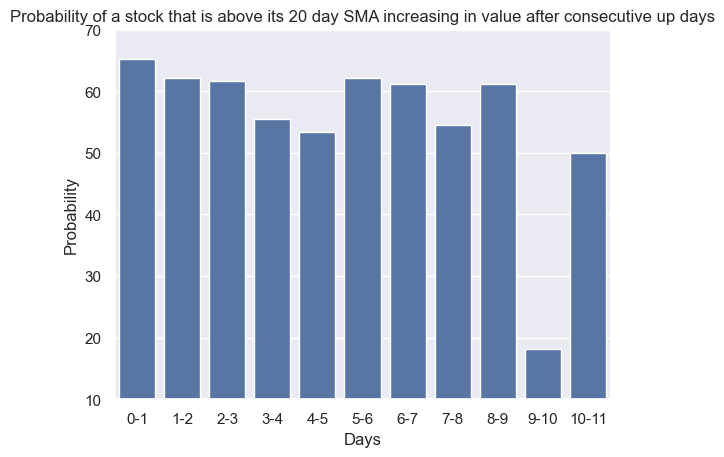

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the theme
sns.set_theme(style="darkgrid")

# Creating a barplot
sns.barplot(x="Tally Index", y="Probability",
             data=final_tally_up_20_dict)

# Adding a title
plt.title("Probability of a stock that is above its 20 day SMA increasing in value after consecutive up days")

# Adjusting the y-axis
plt.ylim(10, 70)

# Changing the x label
plt.xlabel('Days')

# Showing the graph
plt.show()

### 2. If a stock's price is above its 20 day and 200 day moving average, what is the likelihood of a stock increasing in value after x days of consecutive up days?

### Creating a tally of the 20 and 200 SMA consecutive up days tallys

In [58]:
# creating a dictionary that will hold the tally of the consecutive up days tally
tally_up_200_dict = {}

# Creating a for loop that checks each tally and adds it to 'tally_up_200_dict' if the key does not exist or adds 1 to the value if it does
for x in range(len(df)):
    # first checks if the closing price is above the 20 and 200 day simple moving average
    if df.loc[x, 'close'] > df.loc[x, '20_day_SMA'] and df.loc[x, 'close'] > df.loc[x, '200_day_SMA']:
        tally = df.loc[x, 'consecutive_up']
        # adds a tally
        if tally in tally_up_200_dict.keys():
            tally_up_200_dict[tally] += 1
        # starts a tally
        if tally not in tally_up_200_dict.keys():
            tally_up_200_dict[tally] = 1

# Reusing code from previous project. Sorts the tally_up_200_dict by frequency
sorted_tally_up_200_dict = dict(sorted(tally_up_200_dict.items(), key=lambda x: x[1], reverse=True))

# Printing to check if everything is correct
print(f" Tally up 20 dictionary: \n{tally_up_200_dict}\n")

# Printing updated 'sorted_years_dict' to check for errors
print(f" Sorted tally up 20 dictionary: \n{sorted_tally_up_200_dict}\n")

 Tally up 20 dictionary: 
{0: 986, 3: 242, 2: 390, 1: 629, 5: 76, 4: 139, 8: 16, 7: 30, 6: 49, 11: 1, 10: 2, 9: 11}

 Sorted tally up 20 dictionary: 
{0: 986, 1: 629, 2: 390, 3: 242, 4: 139, 5: 76, 6: 49, 7: 30, 8: 16, 9: 11, 10: 2, 11: 1}



### Creating lists that store the percent value of the probability of a stock increasing in value

In [61]:
# creating empty lists
tally_list_200 = []
increasing_probability_list_200 = []

# adds the values from the sorted_tally_up_200_dict to tally_list
for tally in sorted_tally_up_200_dict.values():
    tally_list_200.append(tally)

# prints tally list for error checking
print(tally_list_200)

# calculates the probability of a stock increasing each consecutive day
for x in range(len(tally_list_200)-1):
    increasing_prabability = round((tally_list_200[x+1]/tally_list_200[x])*100, 2)
    increasing_probability_list_200.append(increasing_prabability)

# prints the increasing_probability_list for error checking
print(increasing_probability_list_200)

[986, 629, 390, 242, 139, 76, 49, 30, 16, 11, 2, 1]
[63.79, 62.0, 62.05, 57.44, 54.68, 64.47, 61.22, 53.33, 68.75, 18.18, 50.0]


### Organizing the data for seaborn

In [64]:
# Creating a list of the tally probability index for seaborn manually
probability_index = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "10-11"]

# Creating a new dictionary with two keys: "tally index" and 'frequency'
final_tally_up_200_dict = {"Tally Index": probability_index, "Probability": increasing_probability_list_200}

# printing dictionary to check for errors
print(final_tally_up_200_dict)

{'Tally Index': ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11'], 'Probability': [63.79, 62.0, 62.05, 57.44, 54.68, 64.47, 61.22, 53.33, 68.75, 18.18, 50.0]}


### Graphing the data using Seaborn

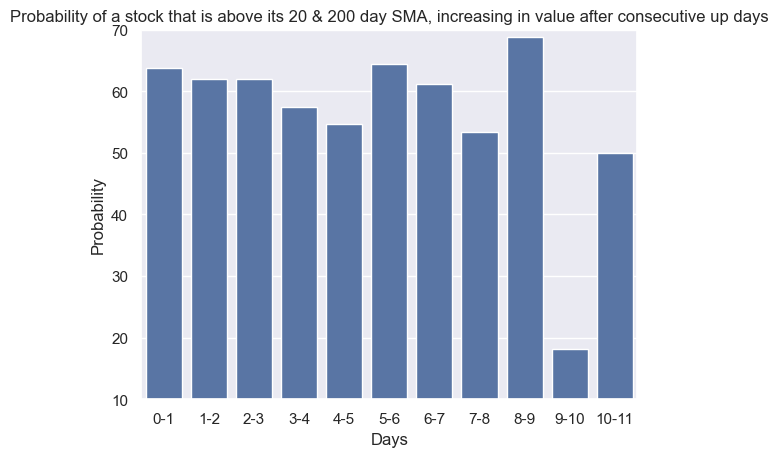

In [67]:
# setting the theme
sns.set_theme(style="darkgrid")

# Creating the barplot
sns.barplot(x="Tally Index", y="Probability",
             data=final_tally_up_200_dict)

# Adding a title
plt.title("Probability of a stock that is above its 20 & 200 day SMA, increasing in value after consecutive up days")

# Adjusting the y-axis
plt.ylim(10, 70)

# Changing the x label
plt.xlabel('Days')

# Showing the graph
plt.show()

### Question 3: If a stock's price is above its 20 day moving average, what is the likelihood of a stock increasing in value after x days of consecutive down days?

### Creating a tally of the 20 SMA consecutive down days tallys

In [71]:
# creating a dictionary that will hold the tally of the consecutive down days tally
tally_down_20_dict = {}

# Creating a for loop that checks each tally and adds it to 'tally_down_20_dict' if the key does not exist or adds 1 to the value if it does
for x in range(len(df)):
    # first checks if the closing price is above the 20 day simple moving average
    if df.loc[x, 'close'] > df.loc[x, '20_day_SMA']:
        tally = df.loc[x, 'consecutive_down']
        # adds a tally
        if tally in tally_down_20_dict.keys():
            tally_down_20_dict[tally] += 1
        # starts a tally
        if tally not in tally_down_20_dict.keys():
            tally_down_20_dict[tally] = 1

# Reusing code from previous project. Sorts the tally_down_20_dict by frequency
sorted_tally_down_20_dict = dict(sorted(tally_down_20_dict.items(), key=lambda x: x[1], reverse=True))

# Printing to check if everything is correct
print(f" Tally down 20 dictionary: \n{tally_down_20_dict}\n")

# Printing updated 'sorted_years_dict' to check for errors
print(f" Sorted tally down 20 dictionary: \n{sorted_tally_down_20_dict}\n")

 Tally down 20 dictionary: 
{0: 1918, 1: 759, 3: 96, 2: 281, 5: 5, 4: 21, 6: 2}

 Sorted tally down 20 dictionary: 
{0: 1918, 1: 759, 2: 281, 3: 96, 4: 21, 5: 5, 6: 2}



### Creating lists that store the percent value of the probability of a stock increasing in value

In [74]:
# creating empty lists
tally_list = []
increasing_probability_list = []

# adds the values from the sorted_tally_down_20_dict to tally_list
for tally in sorted_tally_down_20_dict.values():
    tally_list.append(tally)

# prints tally list for error checking
print(tally_list)

# calculates the probability of a stock increasing each consecutive day
for x in range(len(tally_list)-1):
    decreasing_probability = round((tally_list[x+1]/tally_list[x])*100, 2) 
    increasing_probability = 100 - decreasing_probability
    increasing_probability_list.append(increasing_probability)

# prints the increasing_probability_list for error checking
print(increasing_probability_list)

[1918, 759, 281, 96, 21, 5, 2]
[60.43, 62.98, 65.84, 78.12, 76.19, 60.0]


### Organizing the data for seaborn

In [77]:
# Creating a list of the tally probability index for seaborn manually
probability_index = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6"]

# Creating a new dictionary with two keys: "tally index" and 'frequency'
final_tally_down_20_dict = {"Tally Index": probability_index, "Probability": increasing_probability_list}
print(final_tally_down_20_dict)

{'Tally Index': ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6'], 'Probability': [60.43, 62.98, 65.84, 78.12, 76.19, 60.0]}


### Graphing the data using Seaborn

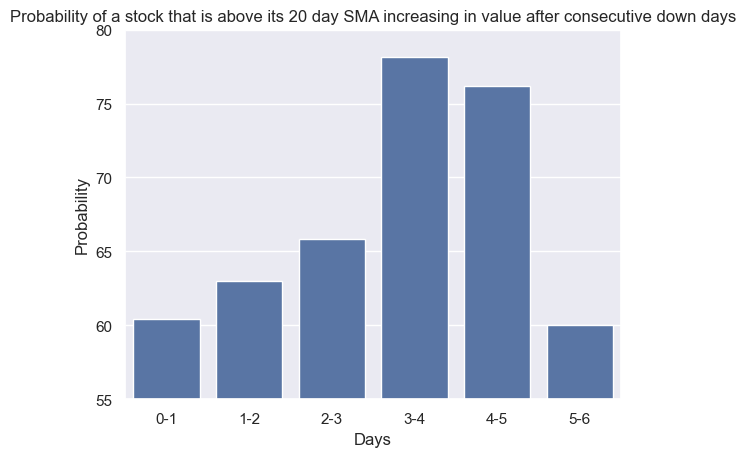

In [80]:
# setting the theme
sns.set_theme(style="darkgrid")

# Creating the baroplot
sns.barplot(x="Tally Index", y="Probability",
             data=final_tally_down_20_dict)

# Adding a title
plt.title("Probability of a stock that is above its 20 day SMA increasing in value after consecutive down days")

# Adjusting the y-axis
plt.ylim(55, 80)

# Changing the x label
plt.xlabel('Days')

# Showing the graph
plt.show()

### Question 4: If a stock's price is above its 20 day and 200 day moving average, what is the likelihood of a stock increasing in value after x days of consecutive down days?

In [83]:
# creating a dictionary that will hold the tally of the consecutive down days tally
tally_down_200_dict = {}

# Creating a for loop that checks each tally and adds it to 'tally_down_200_dict' if the key does not exist or adds 1 to the value if it does
for x in range(len(df)):
    # first checks if the closing price is above the 20 and 200 day simple moving average
    if df.loc[x, 'close'] > df.loc[x, '20_day_SMA'] and df.loc[x, 'close'] > df.loc[x, '200_day_SMA']:
        tally = df.loc[x, 'consecutive_down']
        # adds a tally
        if tally in tally_down_200_dict.keys():
            tally_down_200_dict[tally] += 1
        # starts a tally
        if tally not in tally_down_200_dict.keys():
            tally_down_200_dict[tally] = 1

# Reusing code from previous project. Sorts the tally_up_200_dict by frequency
sorted_tally_down_200_dict = dict(sorted(tally_down_200_dict.items(), key=lambda x: x[1], reverse=True))

# Printing to check if everything is correct
print(f" Tally down 200 dictionary: \n{tally_down_200_dict}\n")

# Printing updated 'sorted_tally_down_200_dict' to check for errors
print(f" Sorted tally down 200 dictionary: \n{sorted_tally_down_200_dict}\n")

 Tally down 200 dictionary: 
{0: 1593, 1: 632, 3: 83, 2: 238, 5: 5, 4: 18, 6: 2}

 Sorted tally down 200 dictionary: 
{0: 1593, 1: 632, 2: 238, 3: 83, 4: 18, 5: 5, 6: 2}



### Creating lists that store the percent value of the probability of a stock increasing in value

In [86]:
# creating empty lists
tally_list_200 = []
increasing_probability_list_200 = []

# adds the values from the sorted_tally_down_200_dict to tally_list_200
for tally in sorted_tally_down_200_dict.values():
    tally_list_200.append(tally)

# prints tally list for error checking
print(tally_list_200)

# calculates the probability of a stock increasing each consecutive day
for x in range(len(tally_list_200)-1):
    decreasing_probability = round((tally_list_200[x+1]/tally_list_200[x])*100, 2)
    increasing_probability = 100 - decreasing_probability
    increasing_probability_list_200.append(increasing_probability)

# prints the increasing_probability_list for error checking
print(increasing_probability_list_200)

[1593, 632, 238, 83, 18, 5, 2]
[60.33, 62.34, 65.13, 78.31, 72.22, 60.0]


### Organizing the data for seaborn

In [89]:
# Creating a new dictionary with two keys: "tally index" and 'frequency'
final_tally_down_200_dict = {"Tally Index": probability_index, "Probability": increasing_probability_list_200}
print(final_tally_down_200_dict)

{'Tally Index': ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6'], 'Probability': [60.33, 62.34, 65.13, 78.31, 72.22, 60.0]}


### Graphing the data using Seaborn

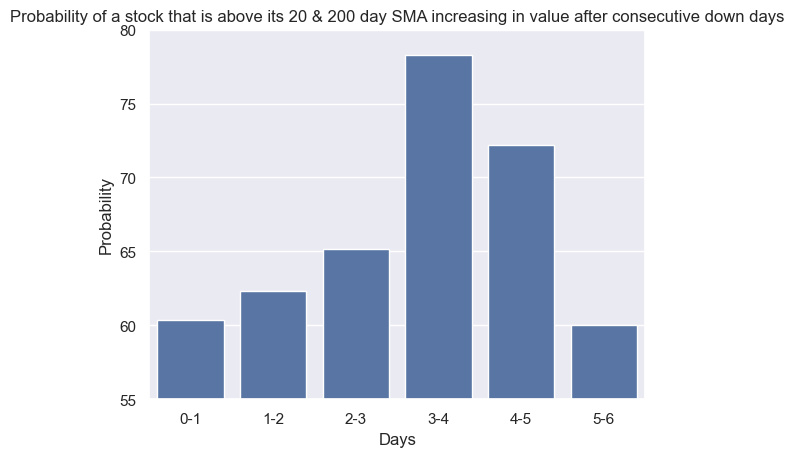

In [92]:
# setting the theme
sns.set_theme(style="darkgrid")

# Creating the barplot
sns.barplot(x="Tally Index", y="Probability",
             data=final_tally_down_200_dict)

# Adding a title
plt.title("Probability of a stock that is above its 20 & 200 day SMA increasing in value after consecutive down days")

# Adjusting the y-axis
plt.ylim(55, 80)

# Changing the x label
plt.xlabel('Days')

# Showing the graph
plt.show()

### Question 5: If a stock's price is below its 20 day moving average, what is the likelihood of a stock increasing in value after x days of consecutive down days and by how much?

In [95]:
# creating a dictionary that will hold the tally of the consecutive down days tally
tally_down_20_dict = {}

# Creating a for loop that checks each tally and adds it to 'tally_down_20_dict' if the key does not exist or adds 1 to the value if it does
for x in range(len(df)):
    # first checks if the closing price is below the 20 day simple moving average
    if df.loc[x, 'close'] < df.loc[x, '20_day_SMA']:
        tally = df.loc[x, 'consecutive_down']
        # adds a tally
        if tally in tally_down_20_dict.keys():
            tally_down_20_dict[tally] += 1
        # starts a tally
        if tally not in tally_down_20_dict.keys():
            tally_down_20_dict[tally] = 1

# Reusing code from previous project. Sorts the tally_down_20_dict by frequency
sorted_tally_down_20_dict = dict(sorted(tally_down_20_dict.items(), key=lambda x: x[1], reverse=True))

# Printing to check if everything is correct
print(f" Tally down 20 dictionary: \n{tally_down_20_dict}\n")

# Printing updated 'sorted_tally_down_20_dict' to check for errors
print(f" Sorted tally down 20 dictionary: \n{sorted_tally_down_20_dict}\n")

 Tally down 20 dictionary: 
{1: 495, 0: 728, 2: 320, 4: 99, 3: 188, 5: 45, 7: 7, 6: 14, 8: 2}

 Sorted tally down 20 dictionary: 
{0: 728, 1: 495, 2: 320, 3: 188, 4: 99, 5: 45, 6: 14, 7: 7, 8: 2}



### Creating lists that store the percent value of the probability of a stock increasing in value

In [98]:
# creating empty lists
tally_list = []
increasing_probability_list = []

# adds the values from the sorted_tally_down_20_dict to tally_list
for tally in sorted_tally_down_20_dict.values():
    tally_list.append(tally)

# prints tally list for error checking
print(tally_list)

# calculates the probability of a stock increasing each consecutive day
for x in range(len(tally_list)-1):
    decreasing_probability = round((tally_list[x+1]/tally_list[x])*100, 2) 
    increasing_probability = 100 - decreasing_probability
    increasing_probability_list.append(round(increasing_probability, 2))

# prints the increasing_probability_list for error checking
print(increasing_probability_list)

[728, 495, 320, 188, 99, 45, 14, 7, 2]
[32.01, 35.35, 41.25, 47.34, 54.55, 68.89, 50.0, 71.43]


### Organizing the data for seaborn

In [101]:
# Creating a list of the tally probability index for seaborn manually
probability_index = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8"]

# Creating a new dictionary with two keys: "tally index" and 'frequency'
final_tally_down_20_dict = {"Tally Index": probability_index, "Probability": increasing_probability_list}
print(final_tally_down_20_dict)

{'Tally Index': ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8'], 'Probability': [32.01, 35.35, 41.25, 47.34, 54.55, 68.89, 50.0, 71.43]}


### Graphing the data using Seaborn

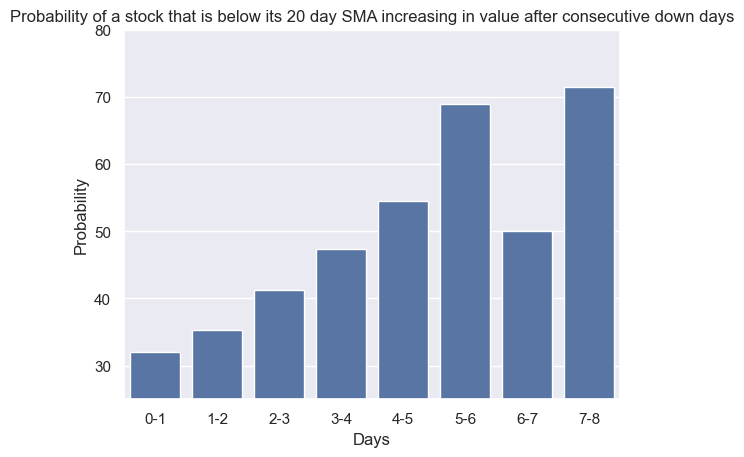

In [104]:
# setting the theme
sns.set_theme(style="darkgrid")

# Creating the barplot
sns.barplot(x="Tally Index", y="Probability",
             data=final_tally_down_20_dict)

# Adding a title
plt.title("Probability of a stock that is below its 20 day SMA increasing in value after consecutive down days")

# Adjusting the y-axis
plt.ylim(25, 80)

# Changing the x label
plt.xlabel('Days')

# Showing the graph
plt.show()

### Question 6: If a stock's price is below its 20 day moving average, what is the likelihood of a stock increasing in value after x days of consecutive up days and by how much?

In [107]:
# creating a dictionary that will hold the tally of the consecutive up days tally
tally_up_20_dict = {}

# Creating a for loop that checks each tally and adds it to 'tally_up_20_dict' if the key does not exist or adds 1 to the value if it does
for x in range(len(df)):
    # first checks if the closing price is below the 20 day simple moving average
    if df.loc[x, 'close'] < df.loc[x, '20_day_SMA']:
        tally = df.loc[x, 'consecutive_up']
        # adds a tally
        if tally in tally_up_20_dict.keys():
            tally_up_20_dict[tally] += 1
        # starts a tally
        if tally not in tally_up_20_dict.keys():
            tally_up_20_dict[tally] = 1

# Reusing code from previous project. Sorts the tally_up_20_dict by frequency
sorted_tally_up_20_dict = dict(sorted(tally_up_20_dict.items(), key=lambda x: x[1], reverse=True))

# Printing to check if everything is correct
print(f" Tally up 20 dictionary: \n{tally_up_20_dict}\n")

# Printing updated 'sorted_years_dict' to check for errors
print(f" Sorted tally up 20 dictionary: \n{sorted_tally_up_20_dict}\n")

 Tally up 20 dictionary: 
{0: 1174, 2: 164, 1: 491, 4: 11, 3: 55, 5: 2, 6: 1}

 Sorted tally up 20 dictionary: 
{0: 1174, 1: 491, 2: 164, 3: 55, 4: 11, 5: 2, 6: 1}



### Creating lists that store the percent value of the probability of a stock increasing in value

In [110]:
# creating empty lists
tally_list = []
increasing_probability_list = []

# adds the values from the sorted_tally_up_20_dict to tally_list
for tally in sorted_tally_up_20_dict.values():
    tally_list.append(tally)

# prints tally list for error checking
print(tally_list)

# calculates the probability of a stock increasing each consecutive day
for x in range(len(tally_list)-1):
    increasing_prabability = round((tally_list[x+1]/tally_list[x])*100, 2)
    increasing_probability_list.append(increasing_prabability)

# prints the increasing_probability_list for error checking
print(increasing_probability_list)

[1174, 491, 164, 55, 11, 2, 1]
[41.82, 33.4, 33.54, 20.0, 18.18, 50.0]


### Organizing the data for seaborn

In [113]:
# Creating a list of the tally probability index for seaborn manually
probability_index = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6"]

# Creating a new dictionary with two keys: "tally index" and 'frequency'
final_tally_up_20_dict = {"Tally Index": probability_index, "Probability": increasing_probability_list}
print(final_tally_up_20_dict)

{'Tally Index': ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6'], 'Probability': [41.82, 33.4, 33.54, 20.0, 18.18, 50.0]}


### Graphing the data using Seaborn

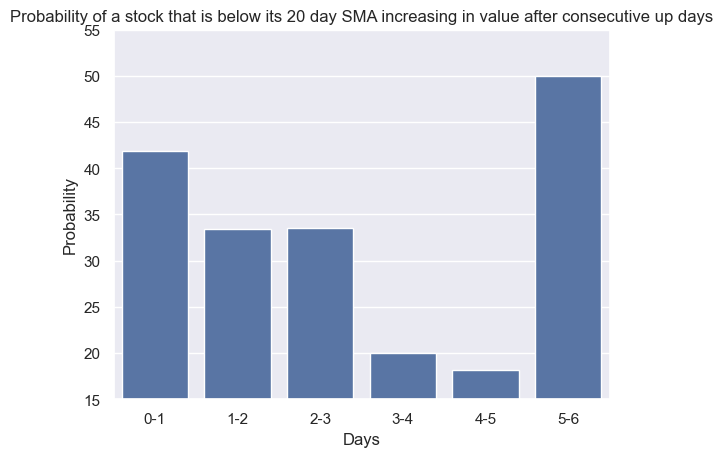

In [116]:
# setting the theme
sns.set_theme(style="darkgrid")

# Creating the barplot
sns.barplot(x="Tally Index", y="Probability",
             data=final_tally_up_20_dict)

# Adding a title
plt.title("Probability of a stock that is below its 20 day SMA increasing in value after consecutive up days")

# Adjusting the y-axis
plt.ylim(15, 55)

# Changing the x label
plt.xlabel('Days')

# Showing the graph
plt.show()